In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [4]:
df = pd.read_csv('../store/covertype/covertype.csv')

In [33]:
df

,index,elevation,aspect,slope,horizontal_distance_to_hydrology,vertical_distance_to_hydrology,horizontal_distance_to_roadways,hillshade_9am,hillshade_noon,hillshade_3pm,horizontal_distance_to_fire_points,wilderness_type,usfs_code,usfs_code_desc,climatic_zone,geologic_zone,cover_type
0,0,2596,51,3,258,0,510,221,232,148,6279,Rawah,7745,"Como - Legault families complex, extremely stony",subalpine,igneous and metamorphic,Aspen
1,1,2590,56,2,212,-6,390,220,235,151,6225,Rawah,7745,"Como - Legault families complex, extremely stony",subalpine,igneous and metamorphic,Aspen
2,2,2804,139,9,268,65,3180,234,238,135,6121,Rawah,4744,"Legault family - Rock land complex, stony",montane,igneous and metamorphic,Lodgepole Pine
3,3,2785,155,18,242,118,3090,238,238,122,6211,Rawah,7746,Como family - Rock land - Legault family compl...,subalpine,igneous and metamorphic,Lodgepole Pine
4,4,2595,45,2,153,-1,391,220,234,150,6172,Rawah,7745,"Como - Legault families complex, extremely stony",subalpine,igneous and metamorphic,Aspen
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581007,581007,2396,153,20,85,17,108,240,237,118,837,Comanche Peak,2703,"Vanet - Ratake families complex, very stony",lower montane,igneous and metamorphic,Ponderosa Pine
581008,581008,2391,152,19,67,12,95,240,237,119,845,Comanche Peak,2703,"Vanet - Ratake families complex, very stony",lower montane,igneous and metamorphic,Ponderosa Pine
581009,581009,2386,159,17,60,7,90,236,241,130,854,Comanche Peak,2703,"Vanet - Ratake families complex, very stony",lower montane,igneous and metamorphic,Ponderosa Pine
581010,581010,2384,170,15,60,5,90,230,245,143,864,Comanche Peak,2703,"Vanet - Ratake families complex, very stony",lower montane,igneous and metamorphic,Ponderosa Pine


### 1. Distribution of ```cover_type``` across different ```wilderness_type```

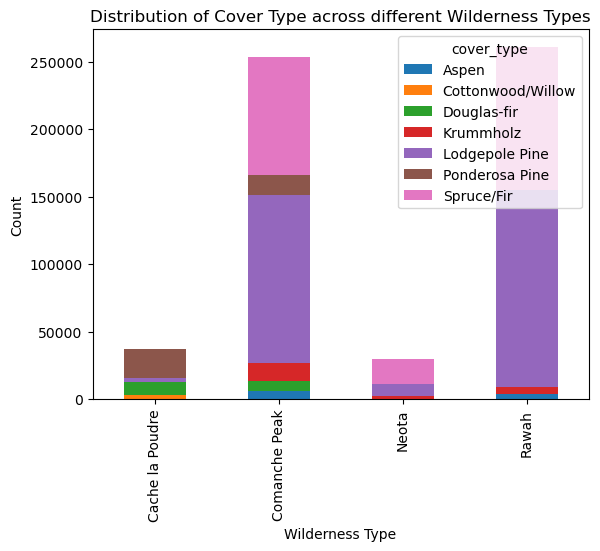

In [6]:
# Distribution of type vs type = Stacked Bar chart

cover_wilderness_counts = df.groupby(['wilderness_type', 'cover_type']).size().unstack()
cover_wilderness_counts.plot(kind='bar', stacked=True)
plt.title('Distribution of Cover Type across different Wilderness Types')
plt.xlabel('Wilderness Type')
plt.ylabel('Count')
plt.show()

### 2. Distribution of elevation on each ```cover_type```

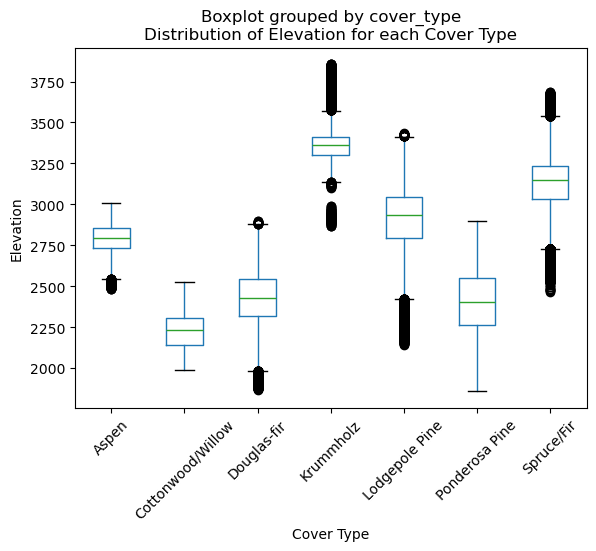

In [17]:
# Distribution of type vs number = Boxplot

df.boxplot(by='cover_type', column='elevation', grid=False)
plt.title('Distribution of Elevation for each Cover Type')
plt.xlabel('Cover Type')
plt.ylabel('Elevation')
plt.xticks(rotation=45)
plt.show()

### 3. Number of data points on each climatic zone

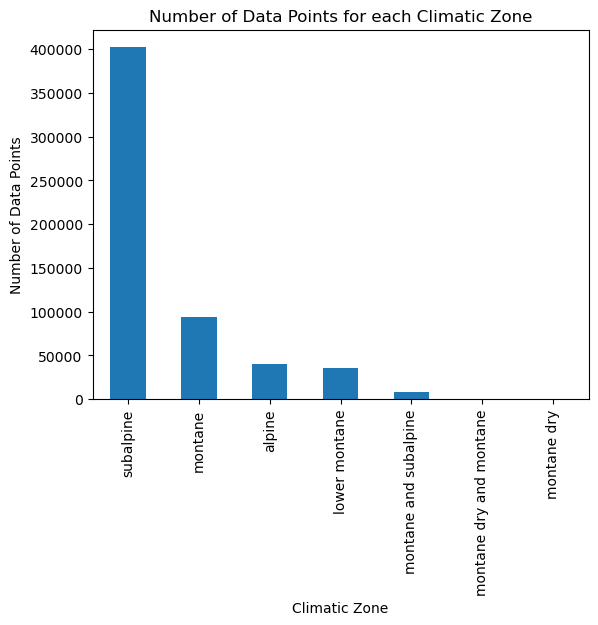

climatic_zone
subalpine                  401983
montane                     93593
alpine                      40437
lower montane               35947
montane and subalpine        8166
montane dry and montane       602
montane dry                   284
Name: count, dtype: int64


In [47]:
# Assuming df is your DataFrame and it has a column 'cover_type'
cover_type_counts = df['climatic_zone'].value_counts()
cover_type_counts.plot(kind='bar')
plt.title('Number of Data Points for each Climatic Zone')
plt.xlabel('Climatic Zone')
plt.ylabel('Number of Data Points')
plt.show()

print(cover_type_counts)

### 4. Which cover type dominates subalpine climate?

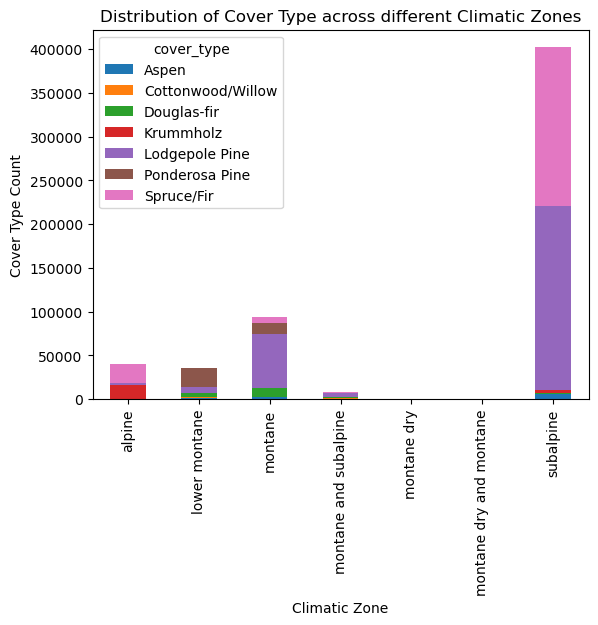

In [29]:
cover_climatic_counts = df.groupby(['climatic_zone', 'cover_type']).size().unstack()
cover_climatic_counts.plot(kind='bar', stacked=True)
plt.title('Distribution of Cover Type across different Climatic Zones')
plt.xlabel('Climatic Zone')
plt.ylabel('Cover Type Count')
plt.show()

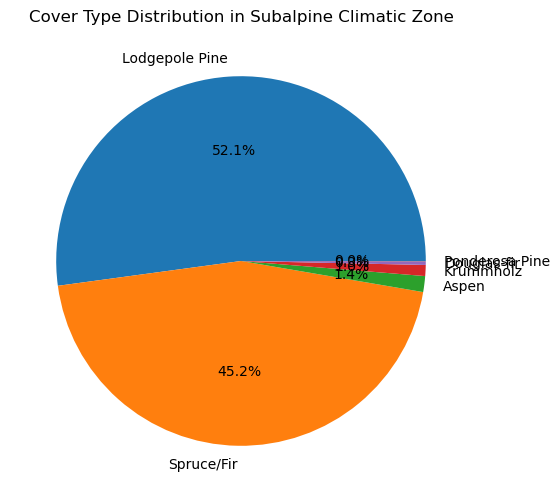

In [31]:
subalpine_df = df[df['climatic_zone'] == 'subalpine']
cover_type_counts = subalpine_df['cover_type'].value_counts()

plt.figure(figsize=(10,6))
plt.pie(cover_type_counts, labels=cover_type_counts.index, autopct='%1.1f%%')
plt.title('Cover Type Distribution in Subalpine Climatic Zone')
plt.show()

**answer:** Lodgepole Pine dominates all others cover types in subalpine climate.

### 5. Which cover type is likely to be found near a body of water?

> Assuming that by the covertype to be recognize as near a body of water, the horizontal and vertical distances to hydrology should be **less or equal to 20**

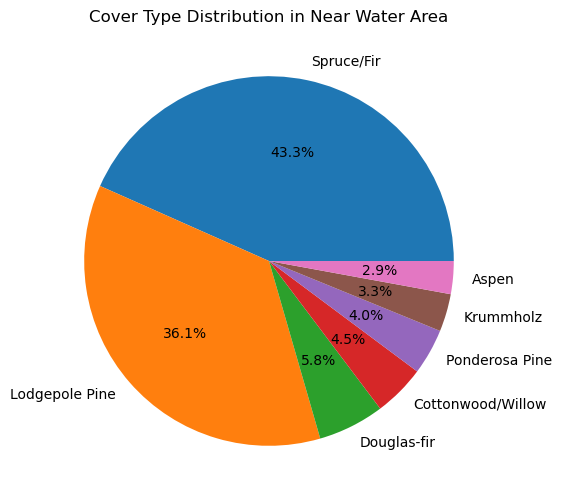

In [58]:
# Assuming df is your DataFrame and it has columns 'horizontal_distance_to_hydrology' and 'vertical_distance_to_hydrology'
near_water_df = df[(df['horizontal_distance_to_hydrology'] <= 20) & (df['vertical_distance_to_hydrology'] <= 20 )]
near_water_cover_type_counts = near_water_df['cover_type'].value_counts()

plt.figure(figsize=(10,6))
plt.pie(near_water_cover_type_counts, labels=near_water_cover_type_counts.index, autopct='%1.1f%%')
plt.title('Cover Type Distribution in Near Water Area')
plt.show()


**answer:** Spruce/Fir Cover Type is what will be likely found near water area.

### 6. Which cover type is likely to be found in a shady area from 9 am to noon.

Wait for P'TA answer

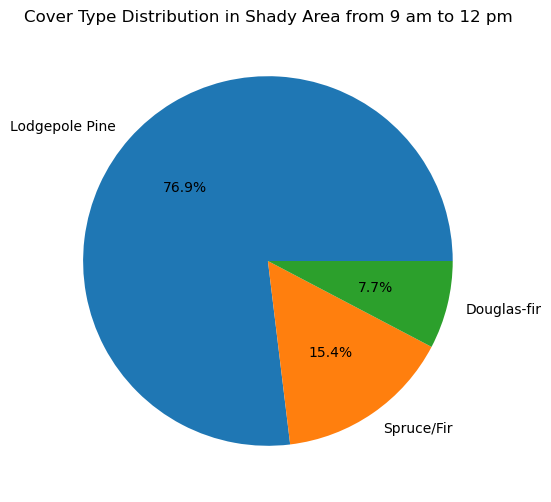

In [57]:
shady_df = df[(df['hillshade_9am'] <= 100) & (df['hillshade_noon'] <= 100 )]
shady_cover_type_counts = shady_df['cover_type'].value_counts()

plt.figure(figsize=(10,6))
plt.pie(shady_cover_type_counts, labels=shady_cover_type_counts.index, autopct='%1.1f%%')
plt.title('Cover Type Distribution in Shady Area from 9 am to 12 pm')
plt.show()


**answer:** Lodgepole Pine dominates all others cover types in subalpine climate.

### 7. Which cover type is likely to be found away from hazardous points (roadways/firepoints)?

> Assuming that by the covertype to be recognize as far from harzardous points, the horizontal distances to roadways/firepoint should be **more or equal to 3328m and 2550m, respectively** (calulated from 75th percentile of the data)

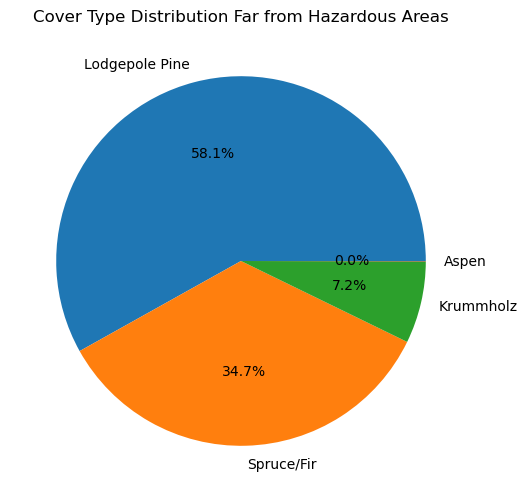

In [50]:
far_hazard = df[(df['horizontal_distance_to_roadways'] >= 3328) & (df['horizontal_distance_to_fire_points'] >= 2550)]
far_hazard_cover_type_count = far_hazard['cover_type'].value_counts()

plt.figure(figsize=(10,6))
plt.pie(far_hazard_cover_type_count, labels=far_hazard_cover_type_count.index, autopct='%1.1f%%')
plt.title('Cover Type Distribution Far from Hazardous Areas')
plt.show()

**answer:** Lodgepole Pine Cover Type is what will be likely found far from hazardous zone.

### 8. Determine whether elevation provides more information to distinguish ```Krummholz``` from ```Cottonwood/Willow``` than ```horizontal_distance_to_hydrology``` ?

In [ ]:
filtered_df = df[(df['cover_type'] == 'Krummholz') & (df['cover_type'] == 'Cottonwood/Willow')]
df.boxplot(by='cover_type', column='elevation', grid=False)
plt.title('Distribution of Elevation for each Cover Type')
plt.xlabel('Cover Type')
plt.ylabel('Elevation')
plt.xticks(rotation=45)
plt.show()